<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [39]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [40]:
# Read CSV
house_csv = "../../data/Sacramento_transactions.csv"
house = pd.read_csv(house_csv)
house

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [41]:
# ANSWER
# Price. We want to predict the house price
y = house['price']

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [42]:
# ANSWER
print(house.drop('price', axis=1).columns)

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'latitude', 'longitude'],
      dtype='object')


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

<AxesSubplot:>

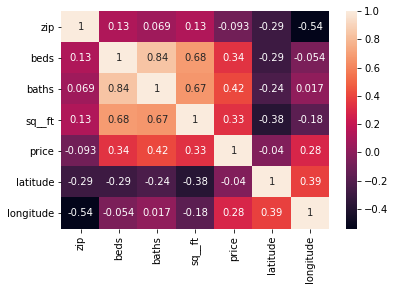

In [43]:
# ANSWER
sns.heatmap(house.corr(), annot=True)
# sq_ft have high positive correlation with number of beds and baths. sq_ft can be a good candidate to predict house price

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

##### 2.4.1 Fit predictor and target variables using linear regression 

In [55]:
# ANSWER

X = house['sq__ft'].values.reshape(-1,1)
y = house['price'].values.reshape(-1,1)

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [56]:
# ANSWER
lr.fit(X,y)
print(f"Coef: {lr.coef_} -- Intercept: {lr.intercept_}")

print(f"R^2 score {lr.score(X,y)}")

Coef: [[54.15863969]] -- Intercept: [162930.161407]
R^2 score 0.11148717682951437


### 3. Splitting Data

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [48]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 3.2 Check Shape, Sample of Test Train Data

In [49]:
# ANSWER
## Check training/test data
print(X_train.shape)
assert X_train.shape == y_train.shape

print(X_test.shape)
assert X_test.shape == y_test.shape

(689, 1)
(296, 1)


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [62]:
# ANSWER
lr.fit(X_train, y_train)
predicted_price = lr.predict(X_test)
print(f"R^2 = {lr.score(X_test, y_test)}")

print(f"Mean^2 error: {mean_squared_error(y_test, predicted_price)}")
print(f"Mean absolute error: {mean_squared_error(y_test, predicted_price)}")

R^2 = 0.17210532117394495
Mean^2 error: 13744172749.449787


In [51]:
# ANSWER
lr.score(X_test, y_test)

0.17210532117394495

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [59]:
# ANSWER
pred_price = lr.predict([[1204]])
pred_price

array([[228137.16359199]])

#### Find the error

In [53]:
# Predict price from X_test



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



